<a href="https://colab.research.google.com/github/naphtron/dsc-phase-1-project/blob/master/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np

In [35]:
#connect to the database
conn = sqlite3.connect('im.db')

Get movie_basics table and movie_ratings table

In [36]:
#read the movie_basics table into pandas dataframe
query = "SELECT * FROM movie_basics"
movie_basics = pd.read_sql(query,conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [37]:
#read the movie_ratings table into pandas dataframe
query = "SELECT * FROM movie_ratings"
movie_ratings = pd.read_sql(query,conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Merge the two dataframes into one which we can work on effectively

In [38]:
df = pd.merge(movie_basics,movie_ratings,on='movie_id')
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


Get overview of dataframe we created

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


Check for duplicates

In [40]:
df.duplicated().any()

False

Check for null values

In [41]:
df.isna().any()

movie_id           False
primary_title      False
original_title     False
start_year         False
runtime_minutes     True
genres              True
averagerating      False
numvotes           False
dtype: bool

We have two columns with null values, runtime_minutes and genres.



# Dealing with Null Values in df['runtime_minute']




In [42]:
(df['runtime_minutes'].isna().sum()/len(df['runtime_minutes']))*100

10.317374350086656

Null values account for about 10% of data in df['runtime']. Since the column is numerical we can replace the null values with the median of the column.

In [43]:
df['runtime_minutes'].fillna(df['runtime_minutes'].median(), inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


# Dealing with Null Values in df['genres']
- Preferred approach is to drop the rows with missing values in the column

In [45]:
df.dropna(subset='genres',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [46]:
# create a new column genre_list to contain genres as list
df['genre_list'] = df['genres'].str.split(',')
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]"
...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,[Documentary]
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,[Documentary]
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,"[Drama, Family]"
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,8.5,8,[Documentary]


After inspection, I noticed that the number of votes for a rating is very skewed.
It's necessary to create a new feature, weighted_rating that would represent a uniform rating.

To create this feature, I'll use the **IMDB formula**.

    Weighted Rating (WR) = (v / (v + m)) * R + (m / (v + m)) * C

Where:

    WR = Weighted Rating
    R = Average rating of the movie (e.g., IMDb rating on a scale of 1 to 10)
    v = Number of votes for the movie
    m = Minimum number of votes required to be considered (you can set a threshold)
    C = Mean rating across all movies in the dataset





In [47]:
df['numvotes'].median()

C = df['averagerating'].mean()
m = df['numvotes'].quantile(0.80)

def weighted_rating(row):
    v = row['numvotes']
    R = row['averagerating']
    return (v / (v + m)) * R + (m / (v + m)) * C

df['weighted_rating'] = df.apply(weighted_rating,axis=1).round(1)
# df[df['weighted_rating']==min(df['weighted_rating'])]
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,weighted_rating
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]",6.4
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]",6.4
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama],6.8
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,"[Comedy, Drama]",6.3
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]",6.4
...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,[Documentary],6.3
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,[Documentary],6.3
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,"[Drama, Family]",6.9
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,8.5,8,[Documentary],6.4


Get summary statistics

In [82]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes,weighted_rating
count,73052.000000,73052.000000,73052.000000,7.305200e+04,73052.000000
mean,2014.281430,94.357677,6.330930,3.562173e+03,6.268206
std,2.615288,198.595006,1.474699,3.045804e+04,0.486230
min,2010.000000,3.000000,1.000000,5.000000e+00,1.400000
25%,2012.000000,83.000000,5.500000,1.400000e+01,6.200000
50%,2014.000000,91.000000,6.500000,5.000000e+01,6.300000
75%,2017.000000,102.000000,7.400000,2.890000e+02,6.400000
max,2019.000000,51420.000000,10.000000,1.841066e+06,9.400000


# Check for Outliers

(0.0, 5000.0)

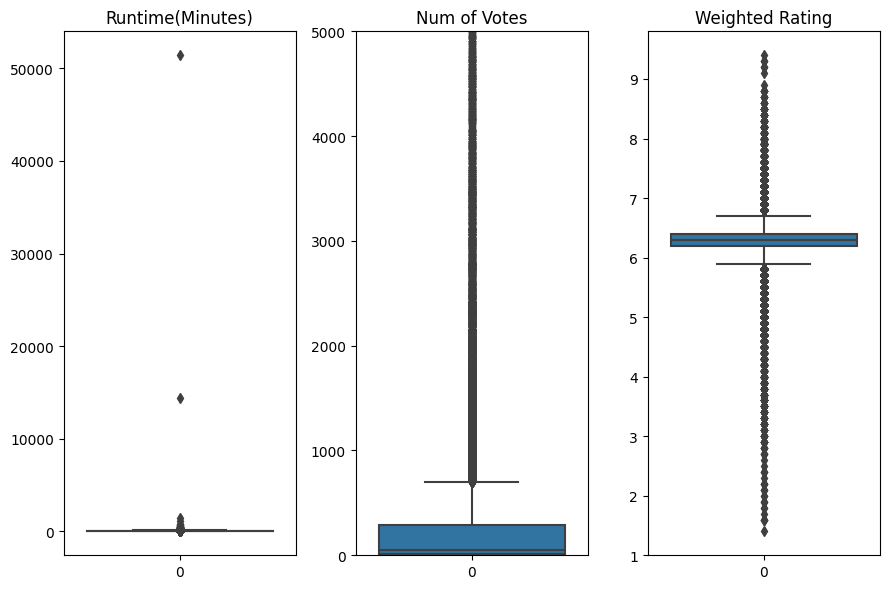

In [48]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize=(9,6),ncols=3)
fig.set_tight_layout(True)

ax1.set_title('Runtime(Minutes)')
sns.boxplot(df['runtime_minutes'],ax=ax1)
ax2.set_title('Num of Votes')
sns.boxplot(df['numvotes'],ax=ax2)
ax3.set_title('Weighted Rating')
sns.boxplot(df['weighted_rating'],ax=ax3);

ax2.set_ylim((0,5000))



In the context of this analysis, I have chosen to not get rid of outliers right away because I believe they hold valuable information for our study. These outliers may represent exceptional or unique characteristics of certain films, and by including them, we aim to capture a more comprehensive and nuanced understanding of the movie industry.








#**Analysis**

##EDA
###Analyzing relationships between features

- Let's first observe the overall trend of movie releases over the years

2010    6701
2011    7274
2012    7602
2013    7905
2014    8269
2015    8405
2016    8613
2017    8638
2018    7476
2019    2169
Name: start_year, dtype: int64


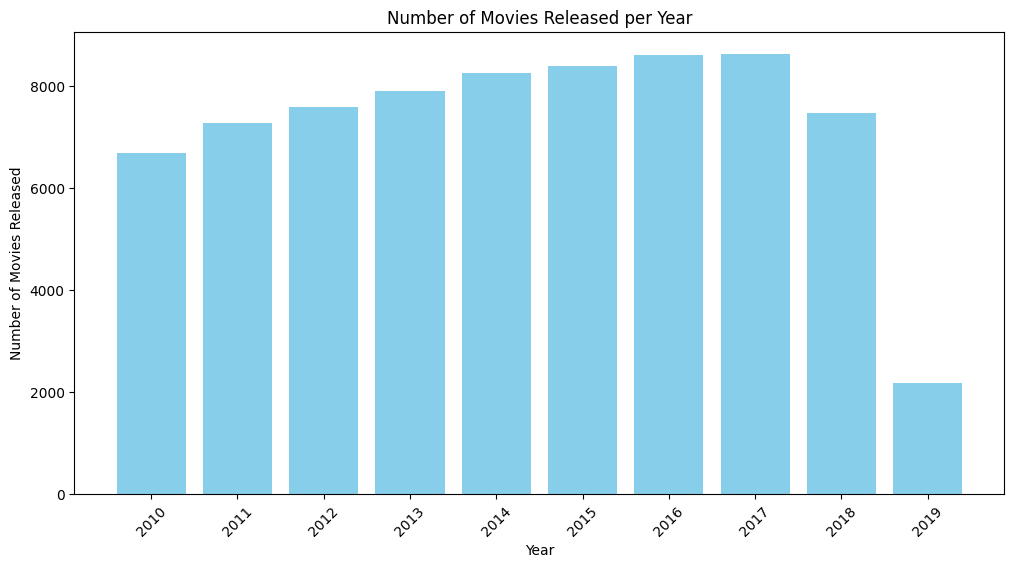

In [49]:
year_counts = df['start_year'].value_counts().sort_index()
print(year_counts)
# Create a bar plot

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(year_counts.index, year_counts.values, color='skyblue')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies Released')
ax.set_title('Number of Movies Released per Year')
ax.set_xticks(year_counts.index,labels = year_counts.index,rotation=45)
plt.show()

The upward trend in movie production/releases from 2010 to 2017 indicates positive growth in the film industry. Several factors, such as economic conditions, improved film technology cutting short production time, and government incentives, could have contributed to this growth.

The reversal of the trend in 2018, with a significant drop in 2019, suggests that there may be challenges or shifts in the industry. Market saturation, economic factors, and the increasing popularity of streaming platforms and its effects on movie production could be contributing to this decline.

Investigating the root causes of this downsurge would indeed require more in-depth analysis and data. Understanding these causes could provide valuable insights for decision-making in the film industry.

In [50]:
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,weighted_rating
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]",6.4
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]",6.4
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama],6.8
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,"[Comedy, Drama]",6.3
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]",6.4
...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,[Documentary],6.3
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,[Documentary],6.3
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,"[Drama, Family]",6.9
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,8.5,8,[Documentary],6.4


### Analyzing the relationship between Runtime and Rating
- I want to find out how the runtime of a movie affects its rating, or if it actually does. I think it's worth investigating

(0.0, 600.0)

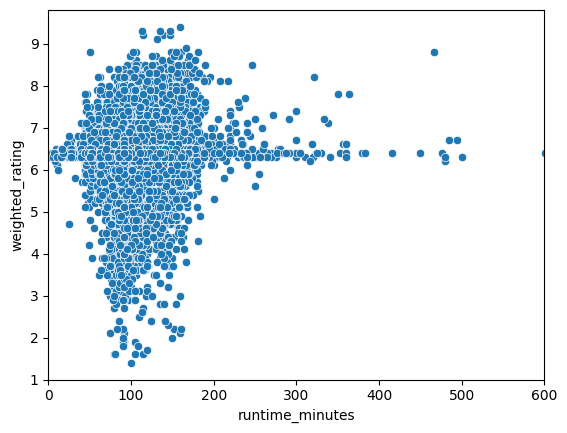

In [51]:
#use scatterplot to visualize relationship between runtime and rating
sns.scatterplot(x=df['runtime_minutes'], y=df['weighted_rating'])
plt.xlim((0,600))


In [72]:
#percentage of non-extreme values
data_minus_outliers = (len(df[(df['runtime_minutes']<=200) & ((df['weighted_rating']>2.5) & (df['weighted_rating']<8.5))]) / len(df) )*100
data_minus_outliers


99.68652466736023

From the scatterplot above we see that about 99% of our data is relatively evenly spread between 0 - 200 on the x-axis and 2.5 - 8.5 on the y-axis.

(0.0, 20.0)

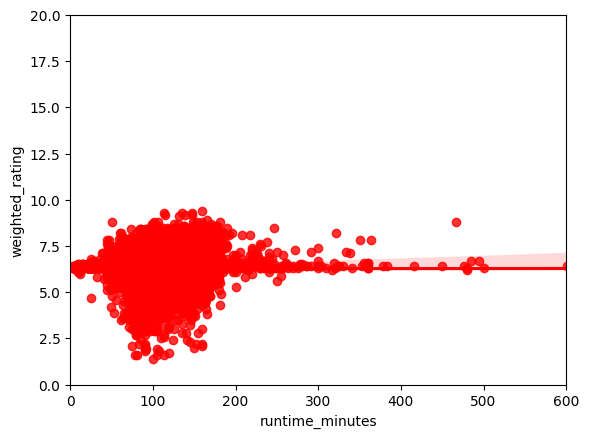

In [53]:
#plot line of best fit
sns.regplot(x=df['runtime_minutes'], y=df['weighted_rating'],color='red',scatter='False')
plt.xlim((0,600))
plt.ylim((0,20))

Line of best fit is a horizontal line parallel to the x-axis.
This indicates absence of a linear relationship between the two features.

In [54]:
#find correlation value between runtime and ratings columns
correlation = df['runtime_minutes'].corr(df['weighted_rating'])
correlation

0.009974871014248793

From the cell above we can see that the correlation coefficient between df['runtime_minutes'] and df['weighted_rating'] is 0.0099 which is almost zero.

- This implies that a change runtime and weighted rating have no statistically significant linear relationship.
- We can conclude that the runtime of a movie **does not affect** its rating.

### Analyzing the Relationship between Genres and Other Features.
This analysis aims to gain insights into viewer preferences within the movie dataset and uncover valuable trends and information.

Goal is to find:
- Identify the most frequently occurring genre to understand its popularity within the dataset.

- Determine which genres tend to receive higher ratings, providing insights into viewer satisfaction.

- Explore the correlation between movie genres and the number of votes, indicating the level of engagement for each genre.

- Investigate the relationship between movie genres and their runtime, shedding light on genre-specific duration preferences.



###Identify the most frequently occurring genre to understand its popularity within the dataset

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
 8   genre_list       73052 non-null  object 
 9   weighted_rating  73052 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 8.1+ MB


- Finding the most popular genre universally (most popular in both single-genred and multi-genred movies)

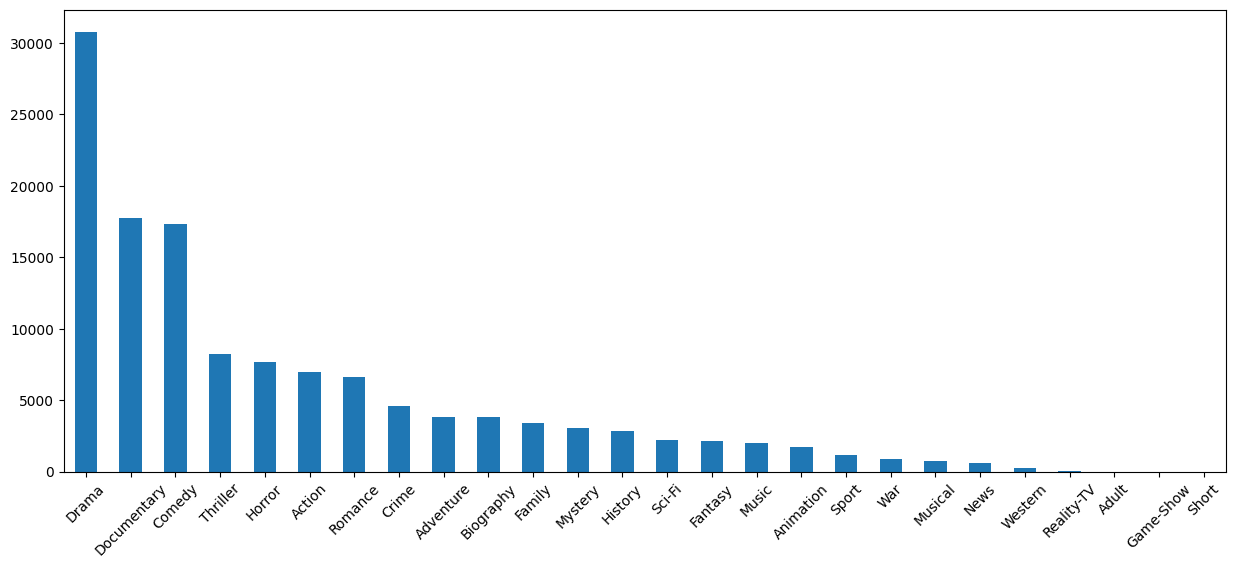

In [56]:
genre_counts = df['genre_list'].explode().value_counts()

#barplot to visualize the data
ax = genre_counts.plot(kind='bar', figsize=(15, 6))
plt.xticks(rotation=45);

From the bar chart above, it is evident that Drama stands out as the most popular genre overall. It not only appears as a single genre but also frequently in multi-genre movies, accounting for approximately 42% of the total movies in the dataset.

- **Find most popular multi-genre**

Comedy,Drama                     2617
Drama,Romance                    1510
Comedy,Romance                   1236
Comedy,Drama,Romance             1208
Horror,Thriller                  1004
Drama,Thriller                    990
Biography,Documentary             694
Documentary,Drama                 582
Documentary,Music                 579
Comedy,Horror                     579
Action,Crime,Drama                562
Crime,Drama,Thriller              504
Crime,Drama                       494
Biography,Documentary,History     479
Drama,Family                      478
Documentary,History               476
Action,Drama                      395
Horror,Mystery,Thriller           378
Biography,Documentary,Drama       377
Drama,Horror,Thriller             356
Action,Thriller                   345
Name: genres, dtype: int64


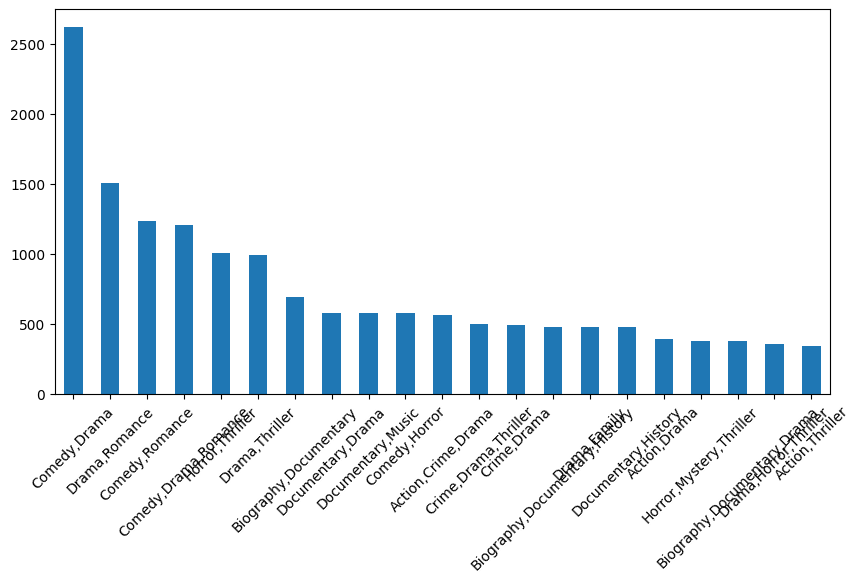

In [57]:
multi_genred_movies = df[df['genre_list'].apply(lambda x:len(x)>1)]

#selecting a subset of values to plot to get overview of distribution of the data
multi_genres_count = multi_genred_movies['genres'].value_counts()
top_multi_genres_count = multi_genres_count[:21]

#plotting a bar chart
ax = top_multi_genres_count.plot(kind='bar',figsize=(10,5))
plt.xticks(rotation=45);

print(top_multi_genres_count)

The most common multi-genre is **"Comedy,Drama"**  appearing 2617 times in the dataset.
The top 10 most common multi-genres and their corresponding counts, ***in descending order***, are:




- Comedy,Drama                    - 2617
- Drama,Romance                   - 1510
- Comedy,Romance                  - 1236
- Comedy,Drama,Romance            - 1208
- Horror,Thriller                 - 1004
- Drama,Thriller                  - 990
- Biography,Documentary           - 694
- Documentary,Drama               - 582
- Documentary,Music               - 579
- Comedy,Horror                   - 579


- Most Popular Genre Yearly

In [59]:
"""
Find the 5 most popular genres and multi-genres in each year
"""


grouped = df.groupby('start_year')

# initialize empty dictionaries
most_popular_genre_yearly = {}
most_popular_multi_genre_yearly = {}

for year, group in grouped:
  genre_counts = group['genre_list'].explode().value_counts()
  multi_genres_df = group[group['genre_list'].apply(lambda x:len(x)>1)]
  multi_genres_count = multi_genres_df['genres'].value_counts()
  most_popular_genre = genre_counts.idxmax()
  most_popular_multi_genre = multi_genres_count.idxmax()
  most_popular_genre_yearly[year] = genre_counts.index[:5].to_list() # key = year, value = [list of top 5 genres in that year]
  most_popular_multi_genre_yearly[year]=multi_genres_count.index[:5].to_list() #key = year, value = [list of top 5 multi_genres in that year]

# print(most_popular_genre_yearly)
# most_popular_multi_genre_yearly

#convert the dictionaries to dataframes for better presentation
most_popular_genre_yearly_df = pd.DataFrame.from_dict(most_popular_genre_yearly, orient='index')
most_popular_multi_genre_yearly_df = pd.DataFrame.from_dict(most_popular_multi_genre_yearly, orient='index')
display(most_popular_genre_yearly_df)
display(most_popular_multi_genre_yearly_df)

,0,1,2,3,4
2010,Drama,Documentary,Comedy,Action,Thriller
2011,Drama,Documentary,Comedy,Thriller,Horror
2012,Drama,Documentary,Comedy,Horror,Thriller
2013,Drama,Documentary,Comedy,Thriller,Horror
2014,Drama,Documentary,Comedy,Thriller,Horror
2015,Drama,Documentary,Comedy,Thriller,Horror
2016,Drama,Documentary,Comedy,Thriller,Horror
2017,Drama,Documentary,Comedy,Horror,Thriller
2018,Drama,Comedy,Documentary,Thriller,Horror
2019,Drama,Comedy,Documentary,Thriller,Horror


,0,1,2,3,4
2010,"Comedy,Drama","Drama,Romance","Comedy,Drama,Romance","Comedy,Romance","Horror,Thriller"
2011,"Comedy,Drama","Drama,Romance","Comedy,Drama,Romance","Comedy,Romance","Drama,Thriller"
2012,"Comedy,Drama","Comedy,Romance","Drama,Romance","Comedy,Drama,Romance","Drama,Thriller"
2013,"Comedy,Drama","Drama,Romance","Comedy,Drama,Romance","Comedy,Romance","Drama,Thriller"
2014,"Comedy,Drama","Drama,Romance","Comedy,Romance","Comedy,Drama,Romance","Horror,Thriller"
2015,"Comedy,Drama","Drama,Romance","Comedy,Drama,Romance","Comedy,Romance","Drama,Thriller"
2016,"Comedy,Drama","Drama,Romance","Comedy,Drama,Romance","Comedy,Romance","Drama,Thriller"
2017,"Comedy,Drama","Drama,Romance","Comedy,Romance","Drama,Thriller","Comedy,Drama,Romance"
2018,"Comedy,Drama","Drama,Romance","Comedy,Romance","Horror,Thriller","Comedy,Drama,Romance"
2019,"Comedy,Drama","Comedy,Romance","Horror,Thriller","Drama,Romance","Drama,Thriller"


- We can see from the dataframes above that the most popular genre and multi-genre respectively are Drama and "Comedy, Drama" year by year, indicating consistent interest in comedies and drama.

- Other popular genres include Documentary, "Comedy,Romance", Horror, Thriller, "Horror,Thriller","Drama,Thriller".
- Overall, the data indicates that preferences in movie genres can shift over time.
- While certain genres like "Comedy,Drama" and "Drama,Romance" maintain consistent popularity, other genres like "Horror,Thriller" experience fluctuations, possibly influenced by factors such as cultural trends or societal changes, and the release of blockbuster movies in specific genres.



- **Determine which genres tend to receive higher ratings, providing insights into viewer satisfaction.**

In [60]:
df_exploded = df.explode('genre_list')
display(df_exploded)
genre_ratings = df_exploded.groupby('genre_list')['weighted_rating'].mean().reset_index()

#mean is my preferred measure of central tendency
sorted_genre_ratings = genre_ratings.sort_values(by='weighted_rating', ascending=False).reset_index(drop=True)
display(sorted_genre_ratings)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,weighted_rating
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,6.4
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Crime,6.4
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama,6.4
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Biography,6.4
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Drama,6.4
...,...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,Documentary,6.3
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Drama,6.9
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Family,6.9
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,8.5,8,Documentary,6.4


,genre_list,weighted_rating
0,Biography,6.502153
1,Sport,6.451993
2,News,6.451986
3,Music,6.446545
4,History,6.444000
5,Documentary,6.443311
6,Short,6.400000
7,War,6.369168
8,Animation,6.364716
9,Musical,6.339112


visualize this data

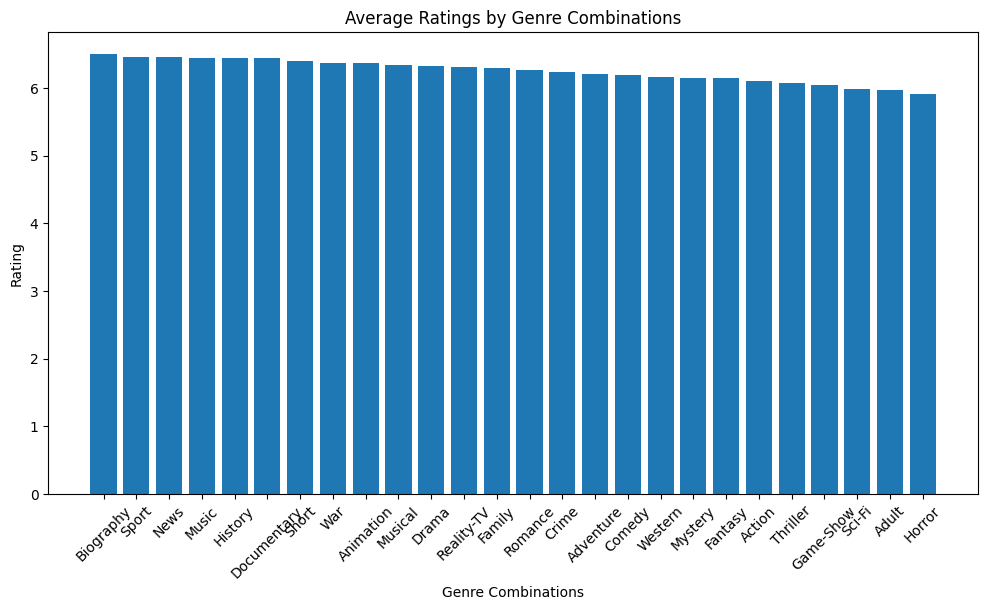

In [61]:
#plot bar chart of genres against average weighted rating
plt.figure(figsize=(12, 6))
plt.bar(sorted_genre_ratings['genre_list'], sorted_genre_ratings['weighted_rating'])
plt.xlabel('Genre Combinations')
plt.ylabel('Rating')
plt.title('Average Ratings by Genre Combinations')
plt.xticks(rotation=45)
plt.show()

- The genres with the highest ratings include Biography, Sport, and News.Interestingly, they are not the most popular among filmmakers.
- Drama, the most popular choice in film production appears 10th in movie rating rankings.
- This may mean that it's a popular choice for production but may not always resonate well with the audience
- Comedy, one of the most produced genres, also has lower
most of the other genres. This might be due to the subjective nature of comedy, diverse sub-genres in comedy where some receive higher rating than others, cultural differences etc.


In [62]:
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,weighted_rating
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]",6.4
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]",6.4
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama],6.8
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,"[Comedy, Drama]",6.3
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]",6.4
...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,[Documentary],6.3
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,[Documentary],6.3
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,"[Drama, Family]",6.9
73853,tt9914642,Albatross,Albatross,2017,91.0,Documentary,8.5,8,[Documentary],6.4


**- Exploring the correlation between movie genres and the number of votes**
- This indicates the level of engagement for each genre.



In [63]:
genre_votes = df_exploded.groupby('genre_list')['numvotes'].mean().reset_index()

sorted_genre_votes = genre_votes.sort_values(by='numvotes', ascending=False).reset_index(drop=True)
display(sorted_genre_votes)

,genre_list,numvotes
0,Adventure,22067.746660
1,Sci-Fi,19474.292384
2,Action,14476.485690
3,Fantasy,12387.443086
4,Animation,8808.549627
5,Western,8758.485714
6,Crime,8594.959011
7,Mystery,8113.618295
8,Thriller,5860.449434
9,Biography,5673.259648


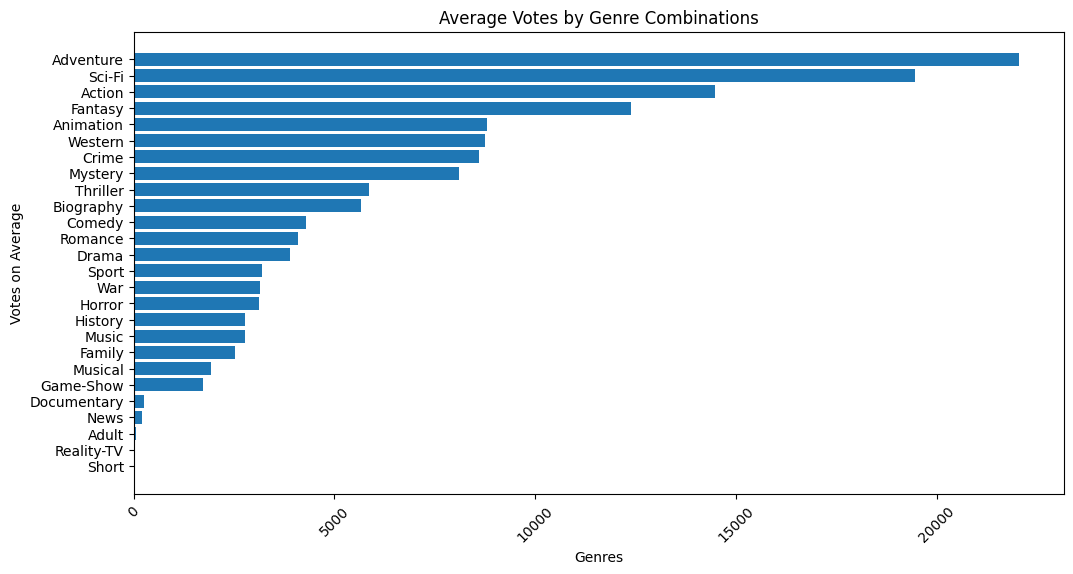

In [71]:
plt.figure(figsize=(12, 6))
plt.barh(sorted_genre_votes['genre_list'][::-1], sorted_genre_votes['numvotes'][::-1])
plt.xlabel('Genres')
plt.ylabel('Votes on Average')
plt.title('Average Votes by Genre Combinations')
plt.xticks(rotation=45)
plt.show()

- Adventure, Sci-Fi, and Action genres tend to receive the highest average number of votes, indicating a high level of audience engagement and interest in these genres.
- Genres like Comedy, Romance, and Drama receive a moderate number of votes, suggesting that they have a decent viewer base but may not be as engaging as the top genres.
- Short and Reality-TV genres receive the lowest number of votes on average, indicating relatively low viewer engagement.

 **Investigating the relationship between movie genres and their runtime.**
- The purpose is to shed light on genre-specific duration preferences

In [74]:
genre_runtime_minutes = df_exploded.groupby('genre_list')['runtime_minutes'].mean().reset_index()

sorted_genre_runtime_minutes = genre_runtime_minutes.sort_values(by='runtime_minutes', ascending=False).reset_index(drop=True)
display(sorted_genre_runtime_minutes)

,genre_list,runtime_minutes
0,Game-Show,117.000000
1,Musical,102.830791
2,Action,102.717373
3,Romance,102.201093
4,Crime,99.006072
5,Drama,97.856178
6,War,96.602579
7,Comedy,96.574263
8,Thriller,95.996349
9,Fantasy,95.828786


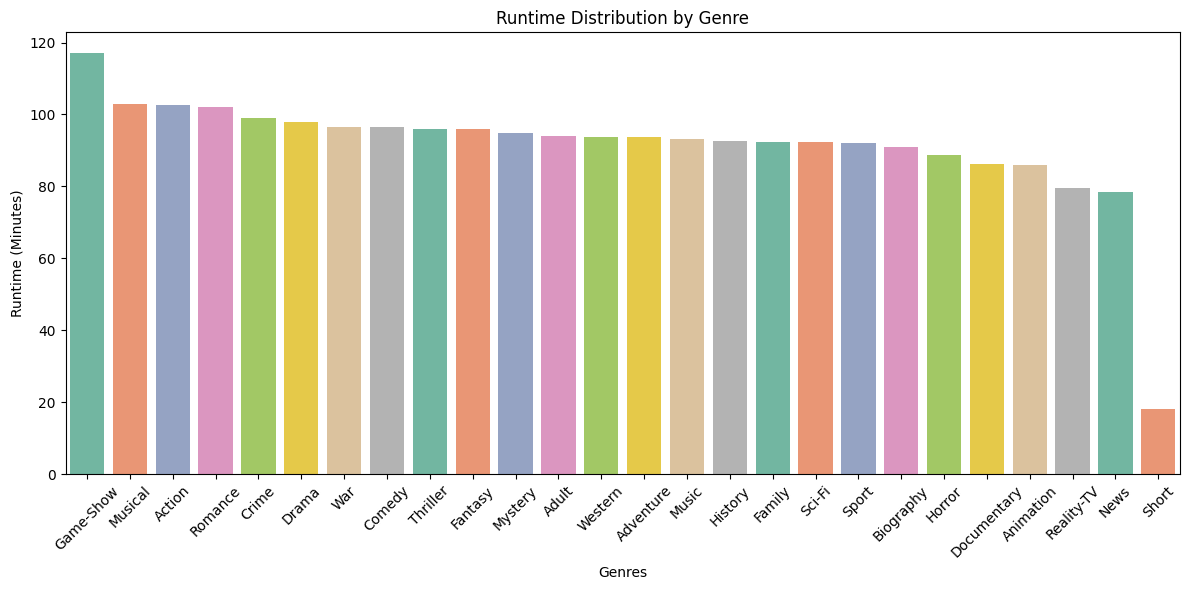

In [81]:
plt.figure(figsize=(12, 6))
sns.barplot(x='genre_list', y='runtime_minutes', data=sorted_genre_runtime_minutes, palette='Set2')
plt.xlabel('Genres')
plt.ylabel('Runtime (Minutes)')
plt.title('Runtime Distribution by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis of movie genres and their average runtimes reveals interesting insights.
- Game-Show genres have the lengthiest average runtimes, averaging around 117 minutes. This extended duration could be attributed to the format of game shows, which often involve various segments and activities.
- Musicals come next, with an average runtime of about 102 minutes, owing to the inclusion of musical numbers and performances.
- Action, Romance, and Crime genres maintain moderate runtimes, typically falling between 95 to 103 minutes, indicating a balanced duration for engaging viewers.
- In contrast, Horror genres have shorter runtimes, around 88 minutes, likely because they rely on suspense and intensity to captivate the audience rather than extended length.

This information will help us determine ideal duration for movies in specific genres.